In [2]:
require 'nn'
require 'nngraph'
require 'image'

 infile  = 'ansel_colorado_1941.png'
 outfile = 'out.png'

d        = torch.load( 'colornet.t7' )
datamean = d.mean
model    = d.model:float()

In [3]:
function pred2rgb( x, data )
   local I = torch.cat( data[1][{{1},{},{}}]:float(),
                        data[1]:clone():float():mul(2):add(-1), 1)
   local O = image.scale( I, x:size(3), x:size(2) )
   local X = image.rgb2lab( image.yuv2rgb( torch.repeatTensor( x, 3, 1, 1 ) ) )
   O    = O*100
   O[1] = X[1]
   O    = image.rgb2yuv( image.lab2rgb( O ) )
   return image.yuv2rgb( torch.cat( x, O[{{2,3},{},{}}], 1 ) )
end

In [7]:
I = image.load( infile )
I = torch.rand(3, 255, 255)
if I:size(1)==3 then I = image.rgb2y(I) end

In [8]:
X2 = image.scale( I, torch.round(I:size(3)/8)*8, torch.round(I:size(2)/8)*8 ):add(-datamean):float()

In [9]:
X1 = image.scale( X2, 224, 224 ):float()
X1 = X1:reshape( 1, X1:size(1), X1:size(2), X1:size(3) )
X2 = X2:reshape( 1, X2:size(1), X2:size(2), X2:size(3) )

model.forwardnodes[9].data.module.modules[3].nfeatures = X2:size(3)/8
model.forwardnodes[9].data.module.modules[4].nfeatures = X2:size(4)/8
print(X2:size(3)/8, X2:size(4)/8)

32	32	


In [145]:
tempRes = model:forward({X1, X2})

In [3]:
print(X1:size(),X2:size())

   1
   1
 224
 224
[torch.LongStorage of size 4]

   1
   1
 256
 256
[torch.LongStorage of size 4]



In [146]:
print(model.forwardnodes[9].data.module)

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.Linear(512 -> 256)
  (2): nn.ReLU
  (3): nn.Replicate
  (4): nn.Replicate
}
{
  train : false
  output : FloatTensor - size: 1x256x3x3
  gradInput : FloatTensor - empty
  modules : 
    {
      1 : 
        nn.Linear(512 -> 256)
        {
          gradBias : FloatTensor - size: 256
          bias : FloatTensor - size: 256
          gradInput : FloatTensor - empty
          weight : FloatTensor - size: 256x512
          train : false
          gradWeight : FloatTensor - size: 256x512
          addBuffer : FloatTensor - size: 1
          _type : torch.FloatTensor
          output : FloatTensor - size: 1x256
        }
      2 : 
        nn.ReLU
        {
          inplace : true
          threshold : 0
          val : 0
          output : FloatTensor - size: 1x256
          gradInput : FloatTensor - empty
          _type : torch.FloatTensor
          train : false
        }
      3 : 
        nn.Replicate
        {

  }
      4 : 
        nn.Replicate
        {
          nfeatures : 3
          train : false
          output : FloatTensor - size: 1x256x3x3
          gradInput : FloatTensor - empty
          _type : torch.FloatTensor
          ndim : 2
          dim : 2
        }
    }
  _type : torch.FloatTensor
}


In [147]:
print(model.forwardnodes[9].data.module:get(1).output:size())
print(model.forwardnodes[9].data.module:get(2).output:size())
print(model.forwardnodes[9].data.module:get(3).output:size())
print(model.forwardnodes[9].data.module:get(4).output:size())

   1
 256
[torch.LongStorage of size 2]

   1
 256
[torch.LongStorage of size 2]

   1
 256
   3
[torch.LongStorage of size 3]

   1
 256
   3
   3
[torch.LongStorage of size 4]



In [150]:
print(model.forwardnodes[9].data.module:get(2).output)

Columns 1 to 10
 0.0000  0.3485  0.0000  0.2241  0.0000  0.4920  0.0000  0.0000  0.4056  0.7939

Columns 11 to 20
 0.1298  0.0000  0.5781  0.6287  0.0000  0.6302  0.0000  0.0000  0.0000  0.0000

Columns 21 to 30
 0.0000  0.0000  0.0000  0.1695  0.0000  0.0000  0.0385  0.0000  0.0000  0.4925

Columns 31 to 40
 0.0000  0.0000  0.0000  0.7698  0.0000  0.5677  0.0000  0.4656  0.5119  0.0000

Columns 41 to 50
 0.6526  0.0936  0.0000  0.0000  0.6947  0.3632  0.0000  0.2257  0.0000  0.0000

Columns 51 to 60
 0.2275  0.0000  0.0000  0.0000  0.1591  0.0000  0.0353  0.4573  0.0000  0.0000

Columns 61 to 70
 0.0000  0.8698  0.0000  0.2752  0.4279  0.0000  0.0000  0.0000  0.1038  0.1424

Columns 71 to 80
 0.0000  0.0000  0.4489  0.0000  0.0000  0.1367  0.0000  0.0000  0.0000  0.1005

Columns 81 to 90
 0.0000  0.3952  0.3804  0.2426  0.3081  1.0970  0.0000  0.0000  0.2693  0.0000

Columns 91 to 100
 0.0000  0.2384  0.1501  0.0000  0.0000  0.0000  0.0000  1.1048  0.0000  0.1571

Columns 101 to 110
 

In [153]:
print(model.forwardnodes[9].data.module:get(3).output)

(1,.,.) = 
  0.0000  0.0000  0.0000
  0.3485  0.3485  0.3485
  0.0000  0.0000  0.0000
  0.2241  0.2241  0.2241
  0.0000  0.0000  0.0000
  0.4920  0.4920  0.4920
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.4056  0.4056  0.4056
  0.7939  0.7939  0.7939
  0.1298  0.1298  0.1298
  0.0000  0.0000  0.0000
  0.5781  0.5781  0.5781
  0.6287  0.6287  0.6287
  0.0000  0.0000  0.0000
  0.6302  0.6302  0.6302
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.1695  0.1695  0.1695
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0385  0.0385  0.0385
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.4925  0.4925  0.4925
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.7698  0.7698  0.7698
  0.0000  0.0000  0.0000
  0.5677  0.5677  0.5677
  0.0000  0.0000  0.0000
  0.4656  0.4656  0.4656
  0.5119  0.5119  0.5119
  0.0000  0.00

0.0000  0.0000
  0.6120  0.6120  0.6120
  0.0947  0.0947  0.0947
  0.0000  0.0000  0.0000
  0.0863  0.0863  0.0863
  0.0000  0.0000  0.0000
  0.0456  0.0456  0.0456
  0.0000  0.0000  0.0000
  0.0608  0.0608  0.0608
  0.0000  0.0000  0.0000
  0.5134  0.5134  0.5134
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.2031  0.2031  0.2031
  0.3893  0.3893  0.3893
  0.1183  0.1183  0.1183
  0.0000  0.0000  0.0000
  0.0890  0.0890  0.0890
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0953  0.0953  0.0953
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.1324  0.1324  0.1324
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.3236  0.3236  0.3236
  0.6525  0.6525  0.6525
  0.0000  0.0000  0.0000
  0.0350  0.0350  0.0350
  0.0729  0.0729  0.0729
  0.0000  0.0000  0.0000
  0.4299  0.4299  0.4299
  0.0000  0.0000  0.0000
  0.1222  0.1222  0.1222
  0.6375  

In [155]:
print(model.forwardnodes[9].data.module:get(3).output)

(1,.,.) = 
  0.0000  0.0000  0.0000
  0.3485  0.3485  0.3485
  0.0000  0.0000  0.0000
  0.2241  0.2241  0.2241
  0.0000  0.0000  0.0000
  0.4920  0.4920  0.4920
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.4056  0.4056  0.4056
  0.7939  0.7939  0.7939
  0.1298  0.1298  0.1298
  0.0000  0.0000  0.0000
  0.5781  0.5781  0.5781
  0.6287  0.6287  0.6287
  0.0000  0.0000  0.0000
  0.6302  0.6302  0.6302
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.1695  0.1695  0.1695
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0385  0.0385  0.0385
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.4925  0.4925  0.4925
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.7698  0.7698  0.7698
  0.0000  0.0000  0.0000
  0.5677  0.5677  0.5677
  0.0000  0.0000  0.0000
  0.4656  0.4656  0.4656
  0.5119  0.5119  0.5119
  0.0000  0.00

0.0000  0.0000
  0.6120  0.6120  0.6120
  0.0947  0.0947  0.0947
  0.0000  0.0000  0.0000
  0.0863  0.0863  0.0863
  0.0000  0.0000  0.0000
  0.0456  0.0456  0.0456
  0.0000  0.0000  0.0000
  0.0608  0.0608  0.0608
  0.0000  0.0000  0.0000
  0.5134  0.5134  0.5134
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.2031  0.2031  0.2031
  0.3893  0.3893  0.3893
  0.1183  0.1183  0.1183
  0.0000  0.0000  0.0000
  0.0890  0.0890  0.0890
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0953  0.0953  0.0953
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.1324  0.1324  0.1324
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.3236  0.3236  0.3236
  0.6525  0.6525  0.6525
  0.0000  0.0000  0.0000
  0.0350  0.0350  0.0350
  0.0729  0.0729  0.0729
  0.0000  0.0000  0.0000
  0.4299  0.4299  0.4299
  0.0000  0.0000  0.0000
  0.1222  0.1222  0.1222
  0.6375  

In [154]:
print(model.forwardnodes[9].data.module:get(4).output)

(1,1,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,2,.,.) = 
  0.3485  0.3485  0.3485
  0.3485  0.3485  0.3485
  0.3485  0.3485  0.3485

(1,3,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,4,.,.) = 
  0.2241  0.2241  0.2241
  0.2241  0.2241  0.2241
  0.2241  0.2241  0.2241

(1,5,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,6,.,.) = 
  0.4920  0.4920  0.4920
  0.4920  0.4920  0.4920
  0.4920  0.4920  0.4920

(1,7,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,8,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,9,.,.) = 
  0.4056  0.4056  0.4056
  0.4056  0.4056  0.4056
  0.4056  0.4056  0.4056

(1,10,.,.) = 
  0.7939  0.7939  0.7939
  0.7939  0.7939  0.7939
  0.7939  0.7939  0.7939

(1,11,.,.) = 
  0.1298  0.1298  0.1298
  0.1298  0.1298  0.1298
  0.1298  0.1298  0.1298

(1,12,.,.) = 
  0.0

  0.3632
  0.3632  0.3632  0.3632

(1,47,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,48,.,.) = 
  0.2257  0.2257  0.2257
  0.2257  0.2257  0.2257
  0.2257  0.2257  0.2257

(1,49,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,50,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,51,.,.) = 
  0.2275  0.2275  0.2275
  0.2275  0.2275  0.2275
  0.2275  0.2275  0.2275

(1,52,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,53,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,54,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,55,.,.) = 
  0.1591  0.1591  0.1591
  0.1591  0.1591  0.1591
  0.1591  0.1591  0.1591

(1,56,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,57,.,.) = 
  0.0353  0.0353  0.0353
  0.0353  0.0353  0.0353
 

= 
  0.2384  0.2384  0.2384
  0.2384  0.2384  0.2384
  0.2384  0.2384  0.2384

(1,93,.,.) = 
  0.1501  0.1501  0.1501
  0.1501  0.1501  0.1501
  0.1501  0.1501  0.1501

(1,94,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,95,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,96,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,97,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,98,.,.) = 
  1.1048  1.1048  1.1048
  1.1048  1.1048  1.1048
  1.1048  1.1048  1.1048

(1,99,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,100,.,.) = 
  0.1571  0.1571  0.1571
  0.1571  0.1571  0.1571
  0.1571  0.1571  0.1571

(1,101,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,102,.,.) = 
  0.3559  0.3559  0.3559
  0.3559  0.3559  0.3559
  0.3559  0.3559  0.3559

(1,103,.,.) = 
  0

000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,138,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,139,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,140,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,141,.,.) = 
  0.7822  0.7822  0.7822
  0.7822  0.7822  0.7822
  0.7822  0.7822  0.7822

(1,142,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,143,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,144,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,145,.,.) = 
  0.2524  0.2524  0.2524
  0.2524  0.2524  0.2524
  0.2524  0.2524  0.2524

(1,146,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,147,.,.) = 
  0.5248  0.5248  0.5248
  0.5248  0.5248  0.5248
  0.5248  0.5248  0.5248

(1,148,.,.) = 
  0.

00  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,183,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,184,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,185,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,186,.,.) = 
  0.0953  0.0953  0.0953
  0.0953  0.0953  0.0953
  0.0953  0.0953  0.0953

(1,187,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,188,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,189,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,190,.,.) = 
  0.1324  0.1324  0.1324
  0.1324  0.1324  0.1324
  0.1324  0.1324  0.1324

(1,191,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,192,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,193,.,.) = 
  0.0

0  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,228,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,229,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,230,.,.) = 
  0.0679  0.0679  0.0679
  0.0679  0.0679  0.0679
  0.0679  0.0679  0.0679

(1,231,.,.) = 
  0.2292  0.2292  0.2292
  0.2292  0.2292  0.2292
  0.2292  0.2292  0.2292

(1,232,.,.) = 
  0.1164  0.1164  0.1164
  0.1164  0.1164  0.1164
  0.1164  0.1164  0.1164

(1,233,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,234,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,235,.,.) = 
  0.0702  0.0702  0.0702
  0.0702  0.0702  0.0702
  0.0702  0.0702  0.0702

(1,236,.,.) = 
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000

(1,237,.,.) = 
  0.4517  0.4517  0.4517
  0.4517  0.4517  0.4517
  0.4517  0.4517  0.4517

(1,238,.,.) = 
  0.00

In [62]:
print(model.forwardnodes[5].data.module)

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
  (2): nn.ReLU
  (3): nn.SpatialConvolution(512 -> 256, 3x3, 1,1, 1,1)
  (4): nn.ReLU
}
{
  train : false
  output : FloatTensor - size: 1x256x40x40
  gradInput : FloatTensor - empty
  modules : 
    {
      1 : 
        nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
        {
          padW : 1
          nInputPlane : 512
          output : FloatTensor - size: 1x512x40x40
          gradInput : FloatTensor - empty
          _type : torch.FloatTensor
          dH : 1
          dW : 1
          nOutputPlane : 512
          padH : 1
          kH : 3
          finput : FloatTensor - size: 1x4608x1600
          weight : FloatTensor - size: 512x512x3x3
          train : false
          gradWeight : FloatTensor - size: 512x512x3x3
          kW : 3
          bias : FloatTensor - size: 512
          gradBias : FloatTensor - size: 512
          fgradInput : FloatTensor - empt

 {
          padW : 1
          nInputPlane : 512
          output : FloatTensor - size: 1x256x40x40
          gradInput : FloatTensor - empty
          _type : torch.FloatTensor
          dH : 1
          dW : 1
          nOutputPlane : 256
          padH : 1
          kH : 3
          finput : FloatTensor - size: 1x4608x1600
          weight : FloatTensor - size: 256x512x3x3
          train : false
          gradWeight : FloatTensor - size: 256x512x3x3
          kW : 3
          bias : FloatTensor - size: 256
          gradBias : FloatTensor - size: 256
          fgradInput : FloatTensor - empty
        }
      4 : 
        nn.ReLU
        {
          inplace : true
          threshold : 0
          val : 0
          output : FloatTensor - size: 1x256x40x40
          gradInput : FloatTensor - empty
          _type : torch.FloatTensor
          train : false
        }
    }
  _type : torch.FloatTensor
}


In [63]:
print(model.forwardnodes[5].data.module:get(4).output:size())

   1
 256
  40
  40
[torch.LongStorage of size 4]



In [160]:
local x = torch.rand(1, 4)
print(x:size())
local m = nn.Replicate(4, 2, 1)
local n = nn.Replicate(4, 2, 2)
local y1 = m:forward(x)
local y2 = n:forward(y1)
print(y1:size())
print(y2:size())
print(x)
print(y1)
print(y2)

 1
 4
[torch.LongStorage of size 2]

 1
 4
 4
[torch.LongStorage of size 3]

 1
 4
 4
 4
[torch.LongStorage of size 4]

 0.7967  0.2942  0.3391  0.4461
[torch.DoubleTensor of size 1x4]

(1,.,.) = 
  0.7967  0.7967  0.7967  0.7967
  0.2942  0.2942  0.2942  0.2942
  0.3391  0.3391  0.3391  0.3391
  0.4461  0.4461  0.4461  0.4461
[torch.DoubleTensor of size 1x4x4]

(1,1,.,.) = 
  0.7967  0.7967  0.7967  0.7967
  0.7967  0.7967  0.7967  0.7967
  0.7967  0.7967  0.7967  0.7967
  0.7967  0.7967  0.7967  0.7967

(1,2,.,.) = 
  0.2942  0.2942  0.2942  0.2942
  0.2942  0.2942  0.2942  0.2942
  0.2942  0.2942  0.2942  0.2942
  0.2942  0.2942  0.2942  0.2942

(1,3,.,.) = 
  0.3391  0.3391  0.3391  0.3391
  0.3391  0.3391  0.3391  0.3391
  0.3391  0.3391  0.3391  0.3391
  0.3391  0.3391  0.3391  0.3391

(1,4,.,.) = 
  0.4461  0.4461  0.4461  0.4461
  0.4461  0.4461  0.4461  0.4461
  0.4461  0.4461  0.4461  0.4461
  0.4461  0.4461  0.4461  0.4461
[torch.DoubleTensor of size 1x4x4x4]



   1
 464
 600
[torch.LongStorage of size 3]

   1
   2
 232
 300
[torch.LongStorage of size 4]



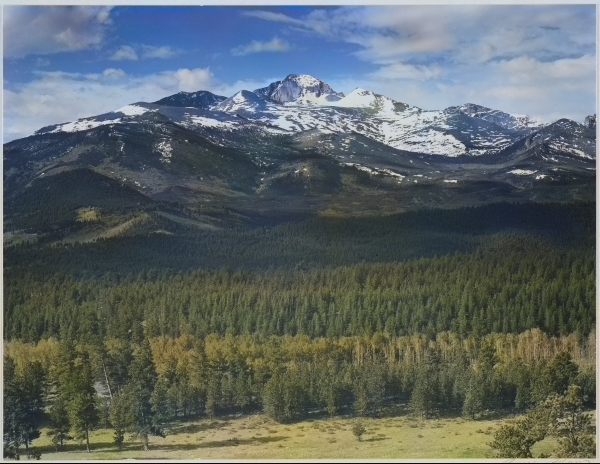

In [8]:
print(I:size())
print(tempRes:size())
img = pred2rgb( I:float(), tempRes )
itorch.image(img)

In [9]:
w, dl_dw = model:getParameters() 

In [25]:
-- print(model.forwardnodes[9].data)

In [17]:
print(X2:size(3)/8)

58	
